In [1]:
%matplotlib inline                  
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from numpy import *
import time
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams.update({'font.size': 18})

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [2]:
start = 1
end = 24
folder = '.'
num = end - start +1

datageneral = np.loadtxt(r''+str(folder)+'/DataGeneral/DataGeneral'+str(start)+'.txt')
dt = datageneral[0]
pxtomum = datageneral[1]
offset = datageneral[2]
videosize = datageneral[3]
boundaryradius = datageneral[4]

dt = 0.05196
#videosize = 800        #800, 521, 256, 128
binning = 1
frametransfer = False
flashtime = 0.01
verticalshift = 1.9176e-6
dtprogram = 2e-3
dtcamtoPC = 1e-3
dtPCtoADwin = 1e-3

R = 2.19e-6/2
T = 273.15+22
kB = 1.38064852e-23
eta=2.414e-5*10**(247.8/(T-140))
D_0 = kB*T/(6*np.pi*eta*R)

In [3]:
data2 = np.loadtxt(r''+str(folder)+'/DataImportant/DataImportant'+str(start)+'.txt')
importantlength = len(data2)

alldata = np.zeros((importantlength,num))
count = 0
for i in range(start,end+1):      
    data2 = np.loadtxt(r''+str(folder)+'/DataImportant/DataImportant'+str(i)+'.txt')
    alldata[:,count] = data2
    count += 1
        
for j in range(importantlength):
    for i in range(num):
        if alldata[j,i] == 0: alldata[j,i] = np.nan
            
delaywave = np.zeros(num)
dtframetransfer = videosize/binning * verticalshift
dtreadout = (1032/27e6+verticalshift)*videosize/binning
for i in range(num): 
    dtexphalf = flashtime/2
    dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
    delaywave[i] = dttotal + (alldata[1,i]-1)*dt

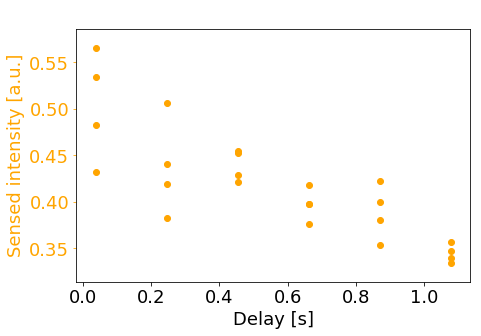

In [4]:
fig = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(111)
ax1.set_xlabel('Delay [s]')#
ax1.scatter(delaywave,alldata[4,:], color='orange')
ax1.set_ylabel('Sensed intensity [a.u.]', color='orange')
ax1.tick_params('y', colors='orange')
ax1.set_title(' ')

plt.tight_layout()
plt.savefig('Intensity vs Delay.pdf', format='pdf')
plt.show()

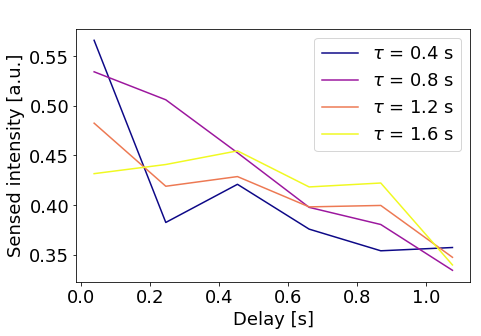

In [5]:
colorwave = cm.plasma(np.linspace(0, 1, 4))
fig = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(111)
ax1.set_xlabel('Delay [s]')#
for i in range(4):
    ax1.plot(delaywave[6*i:6*i+6],alldata[4,6*i:6*i+6], color=colorwave[i],label = r'$\tau$ = '+str(round(0.4+0.4*i,1))+' s')
ax1.set_ylabel('Sensed intensity [a.u.]')
ax1.set_title(' ')
plt.legend()
plt.tight_layout()
plt.savefig('Intensity vs Delay.pdf', format='pdf')
plt.show()

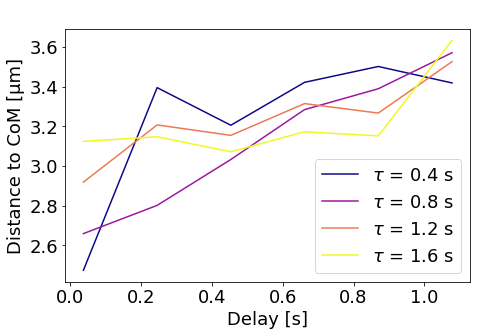

In [6]:
colorwave = cm.plasma(np.linspace(0, 1, 4))
fig = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(111)
ax1.set_xlabel('Delay [s]')#
for i in range(4):
    ax1.plot(delaywave[6*i:6*i+6],alldata[3,6*i:6*i+6], color=colorwave[i],label = r'$\tau$ = '+str(round(0.4+0.4*i,1))+' s')
ax1.set_ylabel('Distance to CoM [µm]')
ax1.set_title(' ')
plt.legend()
plt.tight_layout()
plt.savefig('Distance to CoM vs Delay.pdf', format='pdf')
plt.show()

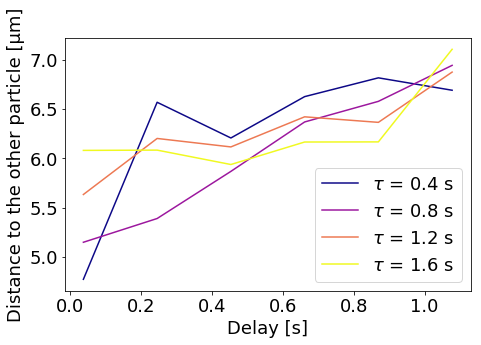

In [7]:
colorwave = cm.plasma(np.linspace(0, 1, 4))
fig = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(111)
ax1.set_xlabel('Delay [s]')#
for i in range(4):
    ax1.plot(delaywave[6*i:6*i+6],alldata[7,6*i:6*i+6], color=colorwave[i],label = r'$\tau$ = '+str(round(0.4+0.4*i,1))+' s')
ax1.set_ylabel('Distance to the other particle [µm]')
ax1.set_title(' ')
plt.legend()
plt.tight_layout()
plt.savefig('Distance to each other.pdf', format='pdf')
plt.show()

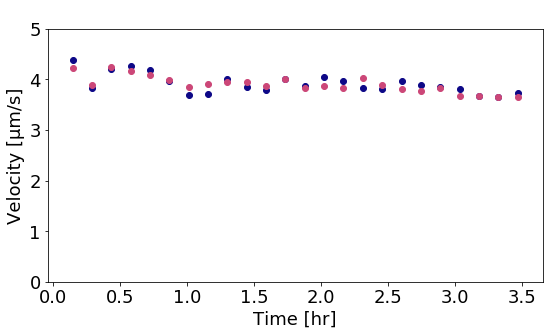

In [8]:
colorwave = cm.plasma(np.linspace(0, 1, 3))
numwave = np.linspace(1,num,num)
numwave[:] *= 10000*dt/60/60

fig = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
for i in range(3):
    #ax1.scatter(delaywave,alldata[5+i,:],color=colorwave[i])
    ax1.scatter(numwave,alldata[8+i,:],color=colorwave[i])
ax1.set_xlabel('Time [hr]')#
ax1.set_ylabel('Velocity [µm/s]')
ax1.tick_params('y')
ax1.set_title(' ')
ax1.set_ylim([0,5])

plt.tight_layout()
plt.savefig('Velocity over time.pdf', format='pdf')
plt.show()

In [13]:
data2 = np.loadtxt(r''+str(folder)+'/DataIntensity/DataIntensity'+str(start)+'.txt')
length = len(data2)
rows = len(data2[0,:])

alldata = np.zeros((length,rows,num))
count = 0
for i in range(start,end+1):      
    data2 = np.loadtxt(r''+str(folder)+'/DataIntensity/DataIntensity'+str(i)+'.txt')
    alldata[:,:,count] = data2
    count += 1

/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


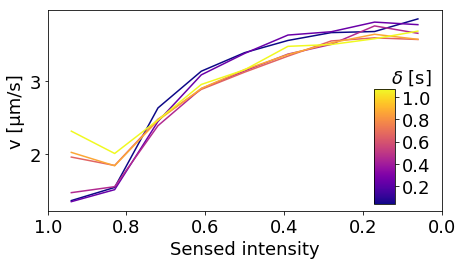

In [15]:
meanvelo = np.zeros((length,num))
for i in range(num):
    meanvelo[:,i] = (alldata[:,5,i]+alldata[:,6,i])/2

fig, ax = plt.subplots(figsize=(7,4))        
colorwave = cm.plasma(np.linspace(0, 1, 6))
ax2 = plt.subplot(1,1,1)
count = 0
for i in range(18,24):
    im = ax2.plot(alldata[:,0,0],meanvelo[:,i],color=colorwave[count], label = 'Delay '+str(round(delaywave[count],2)))
    count += 1
ax2.set_xlabel('Sensed intensity')
ax2.set_ylabel('v [µm/s]')
ax2.set_xlim([1,0])
#ax2.set_title('b)',loc='left')

data = np.linspace(delaywave[0], delaywave[-1], num).reshape(num, 1)
im = ax.imshow(data, cmap='plasma')
divider = make_axes_locatable(ax2)
cax = fig.add_axes([0.8, 0.25, 0.04, 0.4])
plt.colorbar(im, cax=cax)
plt.text(0.8,1.05,r'$\delta$ [s]')

plt.tight_layout()
plt.savefig('Velocity profile depending on delay.pdf', format='pdf')
plt.show()

/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


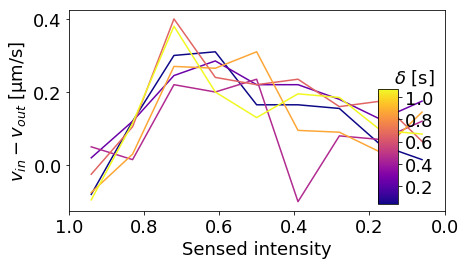

In [16]:
meanveloin = np.zeros((length,num))
meanveloout = np.zeros((length,num))
for i in range(num):
    meanveloin[:,i] = (alldata[:,1,i]+alldata[:,2,i])/2
    meanveloout[:,i] = (alldata[:,3,i]+alldata[:,4,i])/2

fig, ax = plt.subplots(figsize=(7,4))        
colorwave = cm.plasma(np.linspace(0, 1, 6))
ax2 = plt.subplot(1,1,1)
count = 0
for i in range(18,24):
    im = ax2.plot(alldata[:,0,0],meanveloin[:,i]-meanveloout[:,i],color=colorwave[count], label = 'Delay '+str(round(delaywave[count],2)))
    count += 1
ax2.set_xlabel('Sensed intensity')
ax2.set_ylabel(r'$v_{in} - v_{out}$ [µm/s]')
ax2.set_xlim([1,0])
#ax2.set_title('b)',loc='left')

data = np.linspace(delaywave[0], delaywave[-1], num).reshape(num, 1)
im = ax.imshow(data, cmap='plasma')
divider = make_axes_locatable(ax2)
cax = fig.add_axes([0.8, 0.25, 0.04, 0.4])
plt.colorbar(im, cax=cax)
plt.text(0.8,1.05,r'$\delta$ [s]')

plt.tight_layout()
plt.savefig('Vin - Vout tau 1.6.pdf', format='pdf')
plt.show()

/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


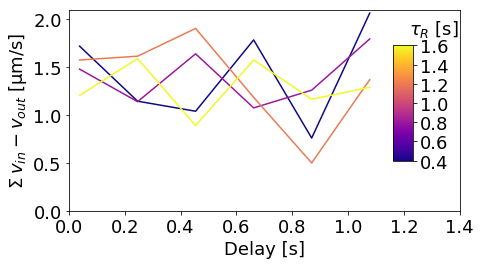

In [17]:
drift = np.zeros((6,4))
count = 0
for j in range(4):
    count2 = 0
    for i in range(4*j,4*j+6):
        drift[count2,j] = sum(meanveloin[:,count]-meanveloout[:,count])
        count += 1
        count2 += 1

fig, ax = plt.subplots(figsize=(7,4))        
colorwave = cm.plasma(np.linspace(0, 1, 4))
ax2 = plt.subplot(1,1,1)
count = 0
for i in range(4):
    im = ax2.plot(delaywave[6*i:6*i+6],drift[:,i],color=colorwave[i])
    count += 1
ax2.set_xlabel('Delay [s]')
ax2.set_ylabel(r'$\Sigma \: v_{in} - v_{out}$ [µm/s]')
ax2.set_ylim([0,2.1])
ax2.set_xlim([0,1.4])
#ax2.set_title('b)',loc='left')

data = np.linspace(0.4, 1.6, num).reshape(num, 1)
im = ax.imshow(data, cmap='plasma')
divider = make_axes_locatable(ax2)
cax = fig.add_axes([0.8, 0.4, 0.04, 0.4])
plt.colorbar(im, cax=cax)
plt.text(0.8,1.1,r'$\tau_{R}$ [s]')

plt.tight_layout()
plt.savefig('Drift.pdf', format='pdf')
plt.show()

In [82]:
i = 0
delaywave[6*i:6*i+6]

array([0.04264594, 0.25048594, 0.45832594, 0.66616594, 0.87400594,
       1.08184594])